In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

c:\Users\pavan\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\pavan\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\pavan\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('city.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [3]:
df=df.drop(['locality','seller_type'],axis=1)

In [4]:
df[['bedroom','bathroom']]=df[['bedroom','bathroom']].astype('int32')

In [5]:
df.head()

,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city
0,2,BHK,Apartment,20000.0,1450.0,Furnished,2,Ahmedabad
1,1,RK,Studio Apartment,7350.0,210.0,Semi-Furnished,1,Ahmedabad
2,3,BHK,Apartment,22000.0,1900.0,Unfurnished,3,Ahmedabad
3,2,BHK,Independent House,13000.0,1285.0,Semi-Furnished,2,Ahmedabad
4,2,BHK,Independent House,18000.0,1600.0,Furnished,2,Ahmedabad


In [6]:
df['layout_type'].value_counts()

layout_type
BHK    183748
RK       9263
Name: count, dtype: int64

In [7]:
df['property_type'].value_counts()

property_type
Apartment            140356
Independent Floor     27283
Independent House     12838
Studio Apartment       9263
Villa                  3115
Penthouse               156
Name: count, dtype: int64

In [8]:
df['furnish_type'].value_counts()

furnish_type
Semi-Furnished    95726
Unfurnished       58696
Furnished         38589
Name: count, dtype: int64

In [9]:
df['city'].value_counts()

city
Mumbai       67416
Delhi        32608
Bangalore    23072
Pune         22596
Ahmedabad    18453
Hyderabad    10544
Kolkata       9664
Chennai       8658
Name: count, dtype: int64

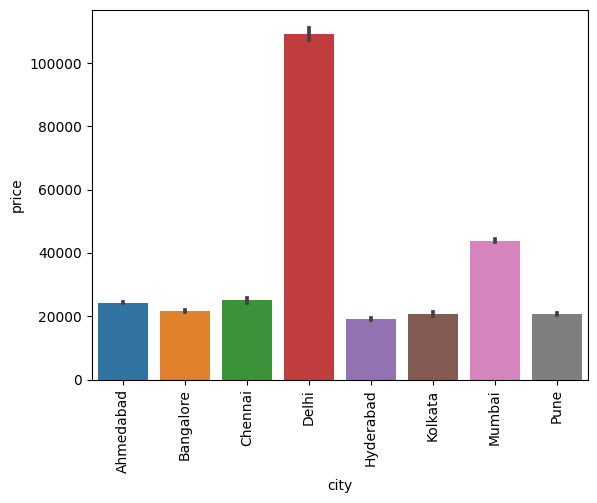

In [10]:
import seaborn as sns
sns.barplot(x=df['city'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

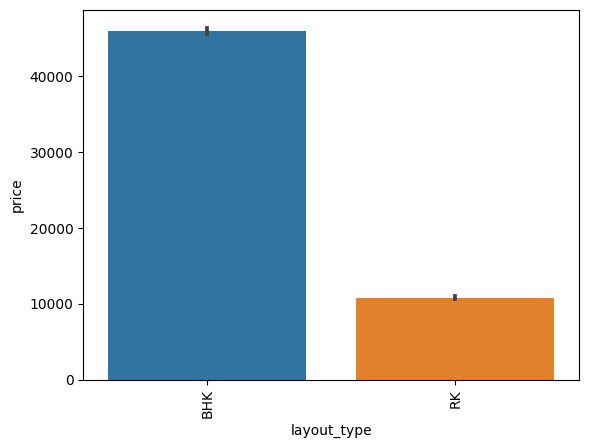

In [11]:
sns.barplot(x=df['layout_type'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

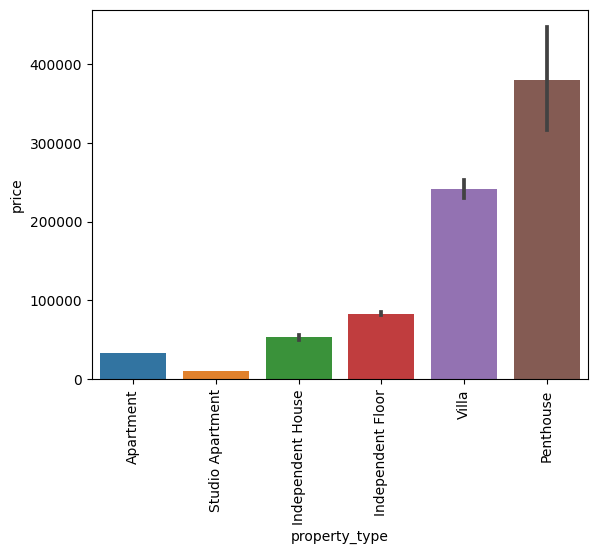

In [12]:
sns.barplot(x=df['property_type'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [13]:
X=df.drop('price',axis=1)
y=df['price']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['area']]=scaler.fit_transform(X_train[['area']])
X_test[['area']]=scaler.transform(X_test[['area']])

In [16]:
X_train

,bedroom,layout_type,property_type,area,furnish_type,bathroom,city
174220,3,BHK,Apartment,0.396677,Unfurnished,3,Pune
98692,2,BHK,Apartment,-0.588290,Furnished,2,Kolkata
171505,2,BHK,Apartment,-0.301407,Unfurnished,1,Pune
175742,2,BHK,Apartment,-0.157965,Unfurnished,2,Pune
84245,3,BHK,Apartment,-0.024086,Furnished,3,Hyderabad
...,...,...,...,...,...,...,...
126917,3,BHK,Apartment,0.559245,Semi-Furnished,2,Mumbai
6715,3,BHK,Apartment,0.712250,Semi-Furnished,3,Ahmedabad
351,2,BHK,Apartment,-0.021217,Unfurnished,2,Ahmedabad
144834,1,BHK,Apartment,-0.529957,Unfurnished,2,Mumbai


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

s1=ColumnTransformer(transformers=[('one_hot',OneHotEncoder(sparse=False,drop='first'),[1,2,4,6])],remainder='passthrough')
s2=RandomForestRegressor()

pipe=Pipeline([('step1',s1),('step2',s2)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2, 4, 6])])),
                ('step2', RandomForestRegressor())])

In [18]:
yhat= pipe.predict(X_test)
yhat

array([367135.20048524,   9710.59902597,  51705.19055556, ...,
        17051.69822246,  11768.12572611,  11618.97799038])

In [19]:
from sklearn.metrics import r2_score
print(r2_score(yhat, y_test))

0.7906932922322077


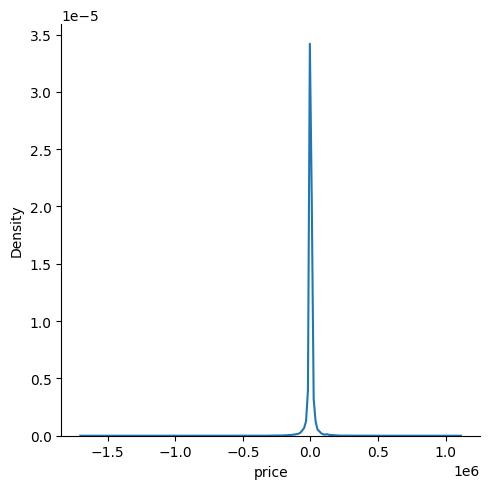

In [20]:
resid=yhat-y_test
sns.displot(resid,kind='kde')

<AxesSubplot: ylabel='price'>

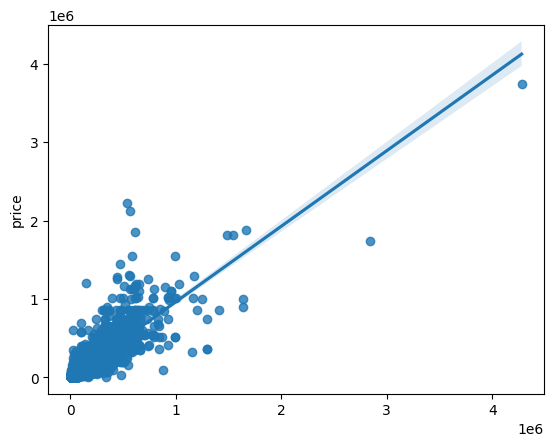

In [21]:
sns.regplot(x=yhat,y=y_test)

In [28]:
q=np.array([3,'BHK','Villa',scaler.transform([[1450]]),'Furnished',3,'Hyderabad'])
q=q.reshape(1,7)
# pipe.predict(q)[0]
q

array([[3, 'BHK', 'Villa', array([[0.17673317]]), 'Furnished', 3,
        'Hyderabad']], dtype=object)

In [23]:
guvjgvjgv

NameError: name 'guvjgvjgv' is not defined

In [24]:
import pickle 
pickle.dump(df,open('dataset.pkl','wb'))
pickle.dump(pipe,open('model_weights.pkl','wb'))

In [25]:
import pickle
pickle.dump(scaler,open('scalar.pkl','wb'))